In [1]:
import os
import glob
import json
import sys
sys.path.append('../')

In [2]:
DATA_PATH = "/path/to/dataset/folder_name/"

In [ ]:
# Prior: create data folder (folder_name) with images and masks subfolders
# Prior: copy all images from CelebA-HQ-img to images folder
# Proor: copy all images with "_hair" from CelebAMask-HQ-mask-anno subfolders to masks folder

# Current folder structure:
# folder_name/
#          -------- images/ 
#                      -------- 3201.jpg
#                      -------- 28520.jpg
#          -------- masks/
#                      -------- 03201_hair.png
#                      -------- 28520_hair.png

In [9]:
img_paths = glob.glob(DATA_PATH + "images/*")
mask_paths = glob.glob(DATA_PATH + "masks/*")

In [10]:
# Not all images have mask
print("N images : " + str(len(img_paths)))
print("N masks : " + str(len(mask_paths)))

N images : 30000
N masks : 29300


In [ ]:
# Goal - unified mask & image names: image - 03201.jpg; mask - 03201.png

In [22]:
for img_path in img_paths:
    img_name = os.path.basename(img_path)
    new_img_name = "0"*(9-len(img_name))+ img_name
    os.rename(img_path, DATA_PATH + "images/" + new_img_name)

In [23]:
img_paths = glob.glob(DATA_PATH + "images/*")
img_paths[:5]

['/media/anja/disk1/DATA/FACE_SEGMENTATION/hair_seg_data/images/17038.jpg',
 '/media/anja/disk1/DATA/FACE_SEGMENTATION/hair_seg_data/images/12459.jpg',
 '/media/anja/disk1/DATA/FACE_SEGMENTATION/hair_seg_data/images/07740.jpg',
 '/media/anja/disk1/DATA/FACE_SEGMENTATION/hair_seg_data/images/05368.jpg',
 '/media/anja/disk1/DATA/FACE_SEGMENTATION/hair_seg_data/images/11340.jpg']

In [26]:
for mask_path in mask_paths:
    mask_name = os.path.basename(mask_path)
    new_mask_name = mask_name.replace("_hair", "")
    os.rename(mask_path, DATA_PATH + "masks/" + new_mask_name)

In [28]:
mask_paths = glob.glob(DATA_PATH + "masks/*")
mask_paths[:5]

['/media/anja/disk1/DATA/FACE_SEGMENTATION/hair_seg_data/masks/03201.png',
 '/media/anja/disk1/DATA/FACE_SEGMENTATION/hair_seg_data/masks/28520.png',
 '/media/anja/disk1/DATA/FACE_SEGMENTATION/hair_seg_data/masks/07423.png',
 '/media/anja/disk1/DATA/FACE_SEGMENTATION/hair_seg_data/masks/13449.png',
 '/media/anja/disk1/DATA/FACE_SEGMENTATION/hair_seg_data/masks/22201.png']

In [35]:
# Removing images that do not have mask

n_removed = 0
for img_path in img_paths:
    img_name = os.path.basename(img_path).split(".")[0]
    if not os.path.exists(DATA_PATH + "masks/" + img_name + ".png"):
        os.remove(img_path)
        n_removed += 1

n_removed

700

In [3]:
img_paths = glob.glob(DATA_PATH + "images/*")
mask_paths = glob.glob(DATA_PATH + "masks/*")
print("N images : " + str(len(img_paths)))
print("N masks : " + str(len(mask_paths)))

N images : 29300
N masks : 29300


In [ ]:
# example data sample point

In [5]:
from matplotlib import pyplot as plt
from PIL import Image

In [7]:
ex_img = Image.open(str(img_paths[0]))

In [8]:
ex_mask = Image.open(DATA_PATH + "/masks/" + os.path.basename(img_paths[0]).split(".")[0] + ".png")

Text(0.5, 1.0, 'Hair Mask')

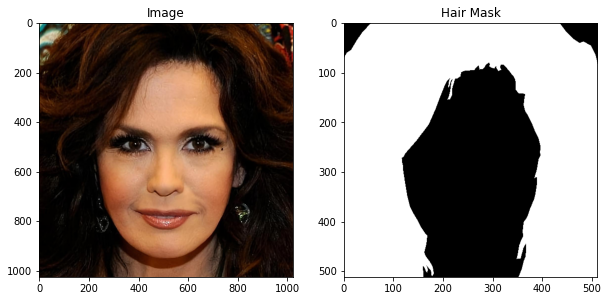

In [20]:
fig = plt.figure(figsize=(10, 10))
img = fig.add_subplot(1, 2, 1)
plt.imshow(ex_img)
img.set_title('Image')
img = fig.add_subplot(1, 2, 2)
plt.imshow(ex_mask)
img.set_title('Hair Mask')

In [21]:
# creating train/valid/test set

In [57]:
import random
import shutil

def train_valid_test_split(folder_path, train_percent, test_percent, save_backup=True):
    
    def copy_set(im_paths, folder_path):
        for im_path in im_paths:
            file_name = os.path.basename(im_path).split(".")[0]

            mask_path = im_path.replace('images', 'masks').replace('jpg', 'png')
            
            shutil.copy(im_path, folder_path + "/images/" + file_name + ".jpg")
            shutil.copy(mask_path, folder_path + "/masks/" + file_name + ".png")
    
    
    if not os.path.exists(folder_path + "train/"):
        os.makedirs(folder_path + "train/images/")
        os.makedirs(folder_path + "train/masks/")
    if not os.path.exists(folder_path + "valid/"):
        os.makedirs(folder_path + "valid/images/")
        os.makedirs(folder_path + "valid/masks/")
    if not os.path.exists(folder_path + "test/"):
        os.makedirs(folder_path + "test/images/")
        os.makedirs(folder_path + "test/masks/")
        
    images = glob.glob(folder_path + "/images/*")

    temp_valid = random.sample(images, k=int((1-train_percent)*len(images)))
    
    test_images = random.sample(temp_valid, k=int(test_percent*len(temp_valid)))
    valid_images = list(filter(lambda x: x not in test_images, temp_valid))
    train_images = list(filter(lambda x: x not in temp_valid, images))
    
    
    copy_set(train_images, folder_path + "train/")
    copy_set(valid_images, folder_path + "valid/")
    copy_set(test_images, folder_path + "test/")
    
    if not save_backup:
        shutil.rmtree(folder_path + "/images/")
        shutil.rmtree(folder_path + "/masks/")
                      
    

In [58]:
train_valid_test_split("/path/to/dataset/folder_name/", 0.8, 0.4)